Kevin Moodie  -- Final Project

"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work." 

# MIS 665: Final Project - IMDB 5000 Movie Database

# 1. Business Understanding

## • What are the project’s goals?
The number of movies being produced each year is growing exponentially each year and it is crucial to understand the success rate of the movie. Movie companies want to maximiize their profits when they are spending billions of dollars. When they are able to know what movies will succeed and which will not, they will be able to adjust their advertising and marketing campaigns. This prediction information will be used to determine the movies overall budget for the movie.

The objective of the IMBD 5000 Movie Database project is the figure out what variables may predict movie success.

References: 
https://ieeexplore.ieee.org/abstract/document/8703320
https://www.researchgate.net/publication/282133920_Predicting_Movie_Success_Based_on_IMDB_Data

## • If you’re hired as a data/business analyst to predict how well a movie will perform in theaters, what kind of data would you collect?

Important variables to collect: 
- IMDB Score
- Budget
- Gross
- Profit
- Number of Critic Reviews
- Number of User Reviews
- Number of Voted Users
- Movie Facebook Likes
- Cast Total Facebook Likes

The variables above are the hypothesis data variables that are important. Below we will see which ones are correct or if there is another variable not mentioned. 

## • What variables are highly correlated to imdb score? 

In the project below, we will review over the IMDB Dataset to see what varibles are highly correlated to the IMDB Score. The Dataset will include the following information: 

| Variable Name | Description
|:-|:-
| movie_title | Title of the Movie
| duration  | Duration in minutes
| director_name  | Name of the Director of the Movie
|  director_facebook_likes | Number of likes of the Director on his Facebook Page
| actor_1_name | Primary actor starring in the movie
| actor_1_facebook_likes | Number of likes of the Actor_1 on his/her Facebook Page
| actor_2_name | Other actor starring in the movie
| actor_2_facebook_likes | Number of likes of the Actor_2 on his/her Facebook Page
| actor_3_name | Other actor starring in the movie
| actor_3_facebook_likes | Number of likes of the Actor_3 on his/her Facebook Page
| num_user_for_reviews  | Number of users who gave a review
| num_critic_for_reviews | Number of critical reviews on imdb
| num_voted_users  | Number of people who voted for the movie
| cast_total_facebook_likes  | Total number of facebook likes of the entire cast of the movie
| movie_facebook_likes  | Number of Facebook likes in the movie page
| plot_keywords | Keywords describing the movie plot
| facenumber_in_poster  | Number of the actor who featured in the movie poster
| color  | Film colorization. ‘Black and White’ or ‘Color’
| genres | Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’
| title_year  | The year in which the movie is released (1916:2016)
| language | English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc
| country | Country where the movie is produced
| content_rating | Content rating of the movie
| aspect_ratio  | Aspect ratio the movie was made in
| movie_imdb_link | IMDB link of the movie
| gross  | Gross earnings of the movie in Dollars
| budget | Budget of the movie in Dollars
| imdb_score | IMDB Score of the movie on IMDB

 
Resource:  
https://stackoverflow.com/questions/21892570/ipython-notebook-align-table-to-the-left-of-cell

## 2. Data Understanding

In [220]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image
from IPython.core.display import HTML

pd.set_option('display.max_columns', 500)

import plotly.graph_objects as go
import plotly.express as px
from IPython.display import Image
from IPython.core.display import HTML

# plotly
import plotly.graph_objects as go
import plotly.express as px

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols


# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier
#import random forest classifier
from sklearn.ensemble import RandomForestClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV

from sklearn.externals.six import StringIO
import pydotplus

# advanced algorthms
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# graphviz
from graphviz import Source

from sklearn.metrics.pairwise import euclidean_distances

pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import scipy.stats as stats

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward


In [221]:
# import dataset
df = pd.read_csv("data/movie_metadata.csv")
df.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0          NaN                      Documentary   

      actor_1_name                                        movie_title  \
0      CCH Pounder                                            Avatar    
1      Johnny Depp          Pirates of the Caribbean: At World's End    
2  Christoph Waltz                                           Spectre    
3        Tom Hardy                             The Dark Knight Rises    
4      Doug Walker  Star Wars: Episode VII - The Force Awakens    ...   

   num_voted_users  cast_total_facebook_likes          actor_3_name  \
0           886204                       4834             Wes Studi   
1           471220                      48350        Jack Davenport   
2           275868                      11700      Stephanie Sigman   
3          1144337                     106759  Joseph Gordon-Levitt   
4                8                        143                   NaN   

   facenumber_in_poster                                      plot_keywords  \
0                   0.0             avatar|future|marine|native|paraplegic   
1                   0.0  goddess|marriage ceremony|marriage proposal|pi...   
2                   1.0                bomb|espionage|sequel|spy|terrorist   
3                   0.0  deception|imprisonment|lawlessness|police offi...   
4                   0.0                                                NaN   

                                     movie_imdb_link  num_user_for_reviews  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...                3054.0   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...                1238.0   
2  http://www.imdb.com/title/tt2379713/?ref_=fn_t...                 994.0   
3  http://www.imdb.com/title/tt1345836/?ref_=fn_t...                2701.0   
4  http://www.imdb.com/title/tt5289954/?ref_=fn_t...                   NaN   

  language country content_rating       budget  title_year  \
0  English     USA          PG-13  237000000.0      2009.0   
1  English     USA          PG-13  300000000.0      2007.0   
2  English      UK          PG-13  245000000.0      2015.0   
3  English     USA          PG-13  250000000.0      2012.0   
4      NaN     NaN            NaN          NaN         NaN   

   actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  
0                   936.0         7.9          1.78                 33000  
1                  5000.0         7.1          2.35                     0  
2                   393.0         6.8          2.35                 85000  
3                 23000.0         8.5          2.35                164000  
4                    12.0         7.1           NaN                     0

### 2.1 Describe Data

In [222]:
# describe data
df.describe()

num_critic_for_reviews     duration  director_facebook_likes  \
count             4993.000000  5028.000000              4939.000000   
mean               140.194272   107.201074               686.509212   
std                121.601675    25.197441              2813.328607   
min                  1.000000     7.000000                 0.000000   
25%                 50.000000    93.000000                 7.000000   
50%                110.000000   103.000000                49.000000   
75%                195.000000   118.000000               194.500000   
max                813.000000   511.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             5020.000000             5036.000000  4.159000e+03   
mean               645.009761             6560.047061  4.846841e+07   
std               1665.041728            15020.759120  6.845299e+07   
min                  0.000000                0.000000  1.620000e+02   
25%                133.000000              614.000000  5.340988e+06   
50%                371.500000              988.000000  2.551750e+07   
75%                636.000000            11000.000000  6.230944e+07   
max              23000.000000           640000.000000  7.605058e+08   

       num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
count     5.043000e+03                5043.000000           5030.000000   
mean      8.366816e+04                9699.063851              1.371173   
std       1.384853e+05               18163.799124              2.013576   
min       5.000000e+00                   0.000000              0.000000   
25%       8.593500e+03                1411.000000              0.000000   
50%       3.435900e+04                3090.000000              1.000000   
75%       9.630900e+04               13756.500000              2.000000   
max       1.689764e+06              656730.000000             43.000000   

       num_user_for_reviews        budget   title_year  \
count           5022.000000  4.551000e+03  4935.000000   
mean             272.770808  3.975262e+07  2002.470517   
std              377.982886  2.061149e+08    12.474599   
min                1.000000  2.180000e+02  1916.000000   
25%               65.000000  6.000000e+06  1999.000000   
50%              156.000000  2.000000e+07  2005.000000   
75%              326.000000  4.500000e+07  2011.000000   
max             5060.000000  1.221550e+10  2016.000000   

       actor_2_facebook_likes   imdb_score  aspect_ratio  movie_facebook_likes  
count             5030.000000  5043.000000   4714.000000           5043.000000  
mean              1651.754473     6.442138      2.220403           7525.964505  
std               4042.438863     1.125116      1.385113          19320.445110  
min                  0.000000     1.600000      1.180000              0.000000  
25%                281.000000     5.800000      1.850000              0.000000  
50%                595.000000     6.600000      2.350000            166.000000  
75%                918.000000     7.200000      2.350000           3000.000000  
max             137000.000000     9.500000     16.000000         349000.000000

As we look at the IMDB Scores, it is important to know the mean IMDB Score: **6.44** 

There is some inacurate data in dataset. Some of the most likely inacurate data are: 
- Budget has a movie with 1.2 billion
- Duration has a movie that is 511 minutes long (an 8 hour long movie?) 
- Other inacurate data (outliers) may be found as we visualize the dataset

### 2.2 Identify Data Quality Issues

In [223]:
# info for data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

_There are 5043 entries and 28 total variables._

### 2.3 Identify Data Types

**Numerical columns:** num_critic_for_reviews, duration, director_facebook_likes, actor_3_facebook_likes, actor_1_facebook_likes, gross, num_voted_users, cast_total_facebook_likes, facenumber_in_poster, num_user_for_reviews, budget, title_year,  actor_2_facebook_likes, imdb_score, aspect_ratio

**Categorical columns:** color, director_name, movie_title, genres, actor_1_name,actor_2_name, actor_3_name, plot_keywords, movie_imdb_link, language, country, content_rating

Most columns are **missing values**

**The dataset will need cleaning and transformation**

### 2.4 Identify Important Value Counts to Predict a Movie's Success (imdb_score)

The below histogram chart gives a quick view at the variables values. It can be used to start to learn more about the variables, as well as start to better understand the dataset. 

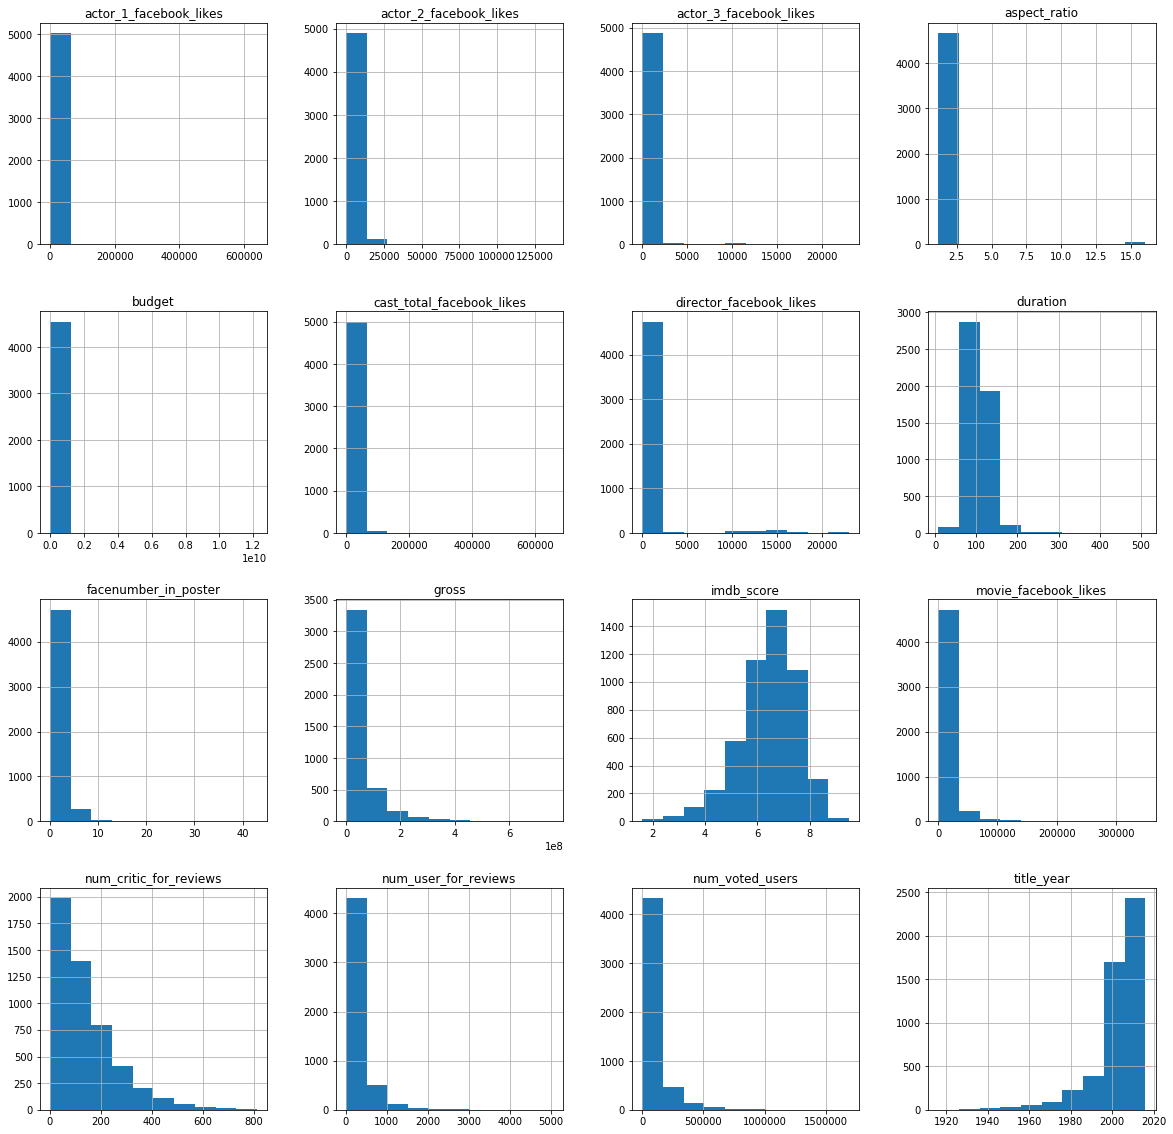

In [224]:
# visualize data w/ histogram
df.hist(figsize=(20,20));

The below groupby variables continue to help us better understand the top and bottom values. This helps us learn how they may impact the IMDB Scores, but start to see how what may need to be cleaned/transformed. 

In [225]:
# budget size
df.groupby('budget').size().tail()

budget
2.127520e+09    1
2.400000e+09    1
2.500000e+09    1
4.200000e+09    1
1.221550e+10    1
dtype: int64

In [226]:
# gross size
df.groupby('gross').size().tail()

gross
533316061.0    1
623279547.0    2
652177271.0    1
658672302.0    1
760505847.0    1
dtype: int64

In [227]:
# country size
df.groupby('country').size().tail()

country
Turkey                     1
UK                       448
USA                     3807
United Arab Emirates       1
West Germany               3
dtype: int64

In [228]:
# genres size
df.groupby('genres').size().head()

genres
Action                                                             11
Action|Adventure                                                   11
Action|Adventure|Animation|Comedy|Crime|Family|Fantasy              1
Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller     1
Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi               2
dtype: int64

In [229]:
# content_rating size
df.groupby('content_rating').size()

content_rating
Approved       55
G             112
GP              6
M               5
NC-17           7
Not Rated     116
PG            701
PG-13        1461
Passed          9
R            2118
TV-14          30
TV-G           10
TV-MA          20
TV-PG          13
TV-Y            1
TV-Y7           1
Unrated        62
X              13
dtype: int64

In [230]:
# plot_keywords size
df.groupby('plot_keywords').size().head()

plot_keywords
10 year old|dog|florida|girl|supermarket                               1
1000000 b.c.|box office hit|lawn mowing|product placement|stone age    1
1190s|archer|england|king of england|robin hood                        1
12 step program|box office hit|car accident|vomiting|wedding           1
12 step program|friend|maid of honor|tears|wedding                     1
dtype: int64

In [231]:
# num_critic_for_reviews size
df.groupby('num_critic_for_reviews').size().tail()

num_critic_for_reviews
739.0    1
750.0    2
765.0    1
775.0    1
813.0    1
dtype: int64

In [232]:
# title_year size
df.groupby('title_year').size().tail()

title_year
2012.0    221
2013.0    237
2014.0    252
2015.0    226
2016.0    106
dtype: int64

## 3. Data Preparation

To find the missing values in each column, we will use the .isnull() function. 

In [233]:
# showing missing values
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

### 3.1 Delete Columns and Rows

As you can see, we have many columns with missing values. We will drop columns that are unneccessary and drop rows with missing values.

In [234]:
# dropping variables not needed
df2 = df.drop(['color', 'movie_imdb_link', 'aspect_ratio', 'language', 'country', 'actor_1_facebook_likes', 'director_facebook_likes',
               'actor_2_name', 'actor_2_facebook_likes', 'actor_3_name', 'actor_3_facebook_likes', 'facenumber_in_poster'], axis=1)
df2.head()

director_name  num_critic_for_reviews  duration        gross  \
0      James Cameron                   723.0     178.0  760505847.0   
1     Gore Verbinski                   302.0     169.0  309404152.0   
2         Sam Mendes                   602.0     148.0  200074175.0   
3  Christopher Nolan                   813.0     164.0  448130642.0   
4        Doug Walker                     NaN       NaN          NaN   

                            genres     actor_1_name  \
0  Action|Adventure|Fantasy|Sci-Fi      CCH Pounder   
1         Action|Adventure|Fantasy      Johnny Depp   
2        Action|Adventure|Thriller  Christoph Waltz   
3                  Action|Thriller        Tom Hardy   
4                      Documentary      Doug Walker   

                                         movie_title  num_voted_users  \
0                                            Avatar            886204   
1          Pirates of the Caribbean: At World's End            471220   
2                                           Spectre            275868   
3                             The Dark Knight Rises           1144337   
4  Star Wars: Episode VII - The Force Awakens    ...                8   

   cast_total_facebook_likes  \
0                       4834   
1                      48350   
2                      11700   
3                     106759   
4                        143   

                                       plot_keywords  num_user_for_reviews  \
0             avatar|future|marine|native|paraplegic                3054.0   
1  goddess|marriage ceremony|marriage proposal|pi...                1238.0   
2                bomb|espionage|sequel|spy|terrorist                 994.0   
3  deception|imprisonment|lawlessness|police offi...                2701.0   
4                                                NaN                   NaN   

  content_rating       budget  title_year  imdb_score  movie_facebook_likes  
0          PG-13  237000000.0      2009.0         7.9                 33000  
1          PG-13  300000000.0      2007.0         7.1                     0  
2          PG-13  245000000.0      2015.0         6.8                 85000  
3          PG-13  250000000.0      2012.0         8.5                164000  
4            NaN          NaN         NaN         7.1                     0

| Dropped Columns
|:-
|  color
|movie_imdb_link
|aspect_ratio
|language
|country
|director_facebook_likes
|actor_1_facebook_likes
|actor_2_name
|actor_2_facebook_likes
|actor_3_name
|actor_3_facebook_likes
|facenumber_in_poster





In [235]:
# showing missing values
df2.isnull().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
plot_keywords                153
num_user_for_reviews          21
content_rating               303
budget                       492
title_year                   108
imdb_score                     0
movie_facebook_likes           0
dtype: int64

The dataset now has 16 categories. 

In [236]:
# dropping missing data (nan) 
df3 = df2.dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 5042
Data columns (total 16 columns):
director_name                3818 non-null object
num_critic_for_reviews       3818 non-null float64
duration                     3818 non-null float64
gross                        3818 non-null float64
genres                       3818 non-null object
actor_1_name                 3818 non-null object
movie_title                  3818 non-null object
num_voted_users              3818 non-null int64
cast_total_facebook_likes    3818 non-null int64
plot_keywords                3818 non-null object
num_user_for_reviews         3818 non-null float64
content_rating               3818 non-null object
budget                       3818 non-null float64
title_year                   3818 non-null float64
imdb_score                   3818 non-null float64
movie_facebook_likes         3818 non-null int64
dtypes: float64(7), int64(3), object(6)
memory usage: 507.1+ KB


The dataset now has 3818 rows and no rows with missing values. This is an aggressive approach, but still has 75% of dataset to review. 

We now need to see if we have any duplicate rows.

In [237]:
# showing length
len(df3)

3818

In [238]:
# remove duplicates
df4=df3.drop_duplicates(keep='first')
len(df4)

3784

In [239]:
# showing info
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3784 entries, 0 to 5042
Data columns (total 16 columns):
director_name                3784 non-null object
num_critic_for_reviews       3784 non-null float64
duration                     3784 non-null float64
gross                        3784 non-null float64
genres                       3784 non-null object
actor_1_name                 3784 non-null object
movie_title                  3784 non-null object
num_voted_users              3784 non-null int64
cast_total_facebook_likes    3784 non-null int64
plot_keywords                3784 non-null object
num_user_for_reviews         3784 non-null float64
content_rating               3784 non-null object
budget                       3784 non-null float64
title_year                   3784 non-null float64
imdb_score                   3784 non-null float64
movie_facebook_likes         3784 non-null int64
dtypes: float64(7), int64(3), object(6)
memory usage: 502.6+ KB


The final dataset has 3784 rows. We still have 75% of the original dataset, even after dropping duplicate rows (34 total duplicates)

## 3.2 Add Column

In [240]:
# adding column profit
df4['profit'] = df4['gross'] - df4['budget']
df4.head()

C:\Users\Kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



director_name  num_critic_for_reviews  duration        gross  \
0      James Cameron                   723.0     178.0  760505847.0   
1     Gore Verbinski                   302.0     169.0  309404152.0   
2         Sam Mendes                   602.0     148.0  200074175.0   
3  Christopher Nolan                   813.0     164.0  448130642.0   
5     Andrew Stanton                   462.0     132.0   73058679.0   

                            genres     actor_1_name  \
0  Action|Adventure|Fantasy|Sci-Fi      CCH Pounder   
1         Action|Adventure|Fantasy      Johnny Depp   
2        Action|Adventure|Thriller  Christoph Waltz   
3                  Action|Thriller        Tom Hardy   
5          Action|Adventure|Sci-Fi     Daryl Sabara   

                                 movie_title  num_voted_users  \
0                                    Avatar            886204   
1  Pirates of the Caribbean: At World's End            471220   
2                                   Spectre            275868   
3                     The Dark Knight Rises           1144337   
5                               John Carter            212204   

   cast_total_facebook_likes  \
0                       4834   
1                      48350   
2                      11700   
3                     106759   
5                       1873   

                                       plot_keywords  num_user_for_reviews  \
0             avatar|future|marine|native|paraplegic                3054.0   
1  goddess|marriage ceremony|marriage proposal|pi...                1238.0   
2                bomb|espionage|sequel|spy|terrorist                 994.0   
3  deception|imprisonment|lawlessness|police offi...                2701.0   
5  alien|american civil war|male nipple|mars|prin...                 738.0   

  content_rating       budget  title_year  imdb_score  movie_facebook_likes  \
0          PG-13  237000000.0      2009.0         7.9                 33000   
1          PG-13  300000000.0      2007.0         7.1                     0   
2          PG-13  245000000.0      2015.0         6.8                 85000   
3          PG-13  250000000.0      2012.0         8.5                164000   
5          PG-13  263700000.0      2012.0         6.6                 24000   

        profit  
0  523505847.0  
1    9404152.0  
2  -44925825.0  
3  198130642.0  
5 -190641321.0

It is important to see if the movie made a profit, so we created a new column by substracting budget from gross. The profit may be useful, or it may turn out to be useless. 

## 3.3 Change Known Inacurate Data

Previous know inacurate data: Duration and Budget

In [241]:
# looking for inacurate duration data
df4.groupby('duration').sum().tail()

num_critic_for_reviews       gross  num_voted_users  \
duration                                                        
289.0                      261.0  78800000.0           450676   
293.0                       96.0  11433134.0           168203   
300.0                       31.0    454255.0             1666   
325.0                      102.0   1500000.0             9830   
330.0                       12.0   4496583.0            23181   

          cast_total_facebook_likes  num_user_for_reviews       budget  \
duration                                                                 
289.0                         25313                 983.0   31500000.0   
293.0                           469                 426.0   14000000.0   
300.0                            32                  47.0  400000000.0   
325.0                         14255                 189.0   44000000.0   
330.0                          3227                 129.0   35000000.0   

          title_year  imdb_score  movie_facebook_likes       profit  
duration                                                             
289.0         1979.0         8.5                 19000   47300000.0  
293.0         1981.0         8.4                 11000   -2566866.0  
300.0         2001.0         6.6                   124 -399545745.0  
325.0         1980.0         6.8                  1000  -42500000.0  
330.0         1993.0         8.0                  6000  -30503417.0

The movie that was 511 minutes long was removed with previous cleaning. 

In [242]:
# looking for inacurate budget data
df4.groupby('budget').sum().tail(10)

num_critic_for_reviews  duration       gross  num_voted_users  \
budget                                                                        
4.000000e+08                    31.0     300.0    454255.0             1666   
5.536320e+08                   160.0     150.0    626809.0            36894   
7.000000e+08                    55.0     308.0   4962754.0            16410   
1.000000e+09                   107.0      99.0  10037390.0             5442   
1.100000e+09                   150.0     124.0    439162.0           106160   
2.127520e+09                   105.0     103.0    410388.0            13727   
2.400000e+09                   174.0     134.0   2298191.0           221552   
2.500000e+09                    73.0     134.0    195888.0             5603   
4.200000e+09                   202.0     112.0    211667.0            53508   
1.221550e+10                   363.0     110.0   2201412.0            68883   

              cast_total_facebook_likes  num_user_for_reviews  title_year  \
budget                                                                      
4.000000e+08                         32                  47.0      2001.0   
5.536320e+08                       2172                 105.0      2008.0   
7.000000e+08                      11193                 304.0      4004.0   
1.000000e+09                         53                 140.0      1999.0   
1.100000e+09                         28                 430.0      1988.0   
2.127520e+09                        991                  79.0      2004.0   
2.400000e+09                       2710                 570.0      1997.0   
2.500000e+09                         11                  45.0      2005.0   
4.200000e+09                        907                 131.0      2005.0   
1.221550e+10                       1173                 279.0      2006.0   

              imdb_score  movie_facebook_likes        profit  
budget                                                        
4.000000e+08         6.6                   124 -3.995457e+08  
5.536320e+08         7.4                     0 -5.530052e+08  
7.000000e+08        13.2                  1198 -1.395037e+09  
1.000000e+09         6.0                   339 -9.899626e+08  
1.100000e+09         8.1                     0 -1.099561e+09  
2.127520e+09         6.9                   973 -2.127110e+09  
2.400000e+09         8.4                 11000 -2.397702e+09  
2.500000e+09         7.1                   607 -2.499804e+09  
4.200000e+09         7.7                  4000 -4.199788e+09  
1.221550e+10         7.0                  7000 -1.221330e+10

When looking at the budget, there are seven movies with a $1 billion budget. We will remove this row as we do not believe this row has accurate data (may not be in US currency vs. foreign currency). 

In [243]:
# removing inacurate budget data
df5 = df4[(df4['budget'] < 1000000000)]
df5.groupby('budget').sum().tail() 

num_critic_for_reviews  duration        gross  num_voted_users  \
budget                                                                        
300000000.0                   412.0     279.0  309506207.0           495790   
390000000.0                   111.0     158.0   14131298.0            55889   
400000000.0                    31.0     300.0     454255.0             1666   
553632000.0                   160.0     150.0     626809.0            36894   
700000000.0                    55.0     308.0    4962754.0            16410   

             cast_total_facebook_likes  num_user_for_reviews  title_year  \
budget                                                                     
300000000.0                      48484                1310.0      4015.0   
390000000.0                        144                 390.0      1999.0   
400000000.0                         32                  47.0      2001.0   
553632000.0                       2172                 105.0      2008.0   
700000000.0                      11193                 304.0      4004.0   

             imdb_score  movie_facebook_likes        profit  
budget                                                       
300000000.0        13.3                     0 -2.904938e+08  
390000000.0         6.4                     0 -3.758687e+08  
400000000.0         6.6                   124 -3.995457e+08  
553632000.0         7.4                     0 -5.530052e+08  
700000000.0        13.2                  1198 -1.395037e+09

The cleaned and transformed IMDB Database now has 3784 entries and 17 variables. We are now ready to visualize the data to find important variables for the IMDB Scores. 

## 4. Business Intelligence

The amount of movies produces have increased rapidly since the late 1970s. The histogram below shows the rapid growth from 1970-2002, where the movies started to peak and be relatively consistent since. 

In [244]:
# visualizing title year and movies per year data
px.histogram(df5, x='title_year', y='imdb_score',
             hover_name='movie_title', color='title_year',
            labels={'title_year':'Year', 'imdb_score':'Movies per Year'})

In [245]:
# visualizing gross vs budget
px.scatter(df5, x="gross", y="budget", color="profit", hover_name='movie_title', trendline='ols') 

The graph above shows that the Budget of most movies is under 200 million and the Gross of most movies under 300 million. This shows that most movies break even or lose money. This visualizes the importance of learning what predicts movie success. 

The graphs below will show the relationship to IMDB Score and the different factors to help visualize important predictors of movie success

In [246]:
# visualizing imdb_score vs gross
px.scatter(df5, x="gross", y="imdb_score", color="imdb_score", hover_name='movie_title', trendline='ols')

The trendline for IMDB Score and Gross is .047. This shows us that there is not likely a correlation.  

In [247]:
# visualizing imdb_score vs budget
px.scatter(df5, x="budget", y="imdb_score", color='imdb_score', hover_name='movie_title', trendline='ols')

The trendline for IMDB Score and Budget is .0013. This shows us that there is not likely a correlation. 

In [248]:
# visualizing imdb_score vs profit
px.scatter(df5, x="profit", y="imdb_score", color='imdb_score', hover_name='movie_title', trendline='ols')

The trendline for IMDB Score and Profit is .054. This shows us that there is likely to be a correlation. 

In [249]:
# visualizing imdb_score vs num_critic_for_reviews
px.scatter(df5, x="num_critic_for_reviews", y="imdb_score", color="imdb_score", hover_name="movie_title", trendline='ols')

The trendline for IMDB Score and Number of Critics Reviews is .121. This shows us there is likely to be a correlation. 

In [250]:
# visualizing imdb_score vs num_user_for_reviews
px.scatter(df5, x="num_user_for_reviews", y="imdb_score", color="imdb_score", hover_name="movie_title", trendline='ols')

The trendline for IMDB Score and Number of User Reviews is .105. This shows us that there is likely to be a correlation. 

In [251]:
# visualizing imdb_score vs cast_total_facebook_likes
px.scatter(df5, x="cast_total_facebook_likes", y="imdb_score", color="imdb_score", hover_name="movie_title", trendline='ols')

The trendline for IMDB Score and Cast Total Facebook Likes is .011. This shows us that there is not likely a correlation. 

In [252]:
# visualizing imdb_score vs num_voted_users
px.scatter(df5, x="num_voted_users", y="imdb_score", color="imdb_score", hover_name="movie_title", trendline='ols')

The trendline for IMDB Score and Number of Voted Users is .23. This shows us that there is likely to be a correlation. 

| Likely Correlation  | Unlikely Correlation
|:- | :-
| Profit | Gross
| Number of Critics Reviews | Budget
| Number of User Reviews | Cast Total Facebook Likes
| Movie Facebook Likes |
| Number of Voted Users

Next, we will group the IMDB Scores into 5 categories (bins) - 10-8, 8-6, 6-4, 4-2, 2-0. Breaking down the IMDB Scores into 5 categories will help us see if they have a possible correlation when compared to the different values (ie. budget, gross, profit, etc.)

In [253]:
# creating imbd_score_bins
df6 = df5
df6['imdb_score_bins'] = pd.cut(df6['imdb_score'], bins=[0, 2, 4, 6, 8, 10], labels=[1, 2, 3, 4, 5])
df6.head()

C:\Users\Kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



director_name  num_critic_for_reviews  duration        gross  \
0      James Cameron                   723.0     178.0  760505847.0   
1     Gore Verbinski                   302.0     169.0  309404152.0   
2         Sam Mendes                   602.0     148.0  200074175.0   
3  Christopher Nolan                   813.0     164.0  448130642.0   
5     Andrew Stanton                   462.0     132.0   73058679.0   

                            genres     actor_1_name  \
0  Action|Adventure|Fantasy|Sci-Fi      CCH Pounder   
1         Action|Adventure|Fantasy      Johnny Depp   
2        Action|Adventure|Thriller  Christoph Waltz   
3                  Action|Thriller        Tom Hardy   
5          Action|Adventure|Sci-Fi     Daryl Sabara   

                                 movie_title  num_voted_users  \
0                                    Avatar            886204   
1  Pirates of the Caribbean: At World's End            471220   
2                                   Spectre            275868   
3                     The Dark Knight Rises           1144337   
5                               John Carter            212204   

   cast_total_facebook_likes  \
0                       4834   
1                      48350   
2                      11700   
3                     106759   
5                       1873   

                                       plot_keywords  num_user_for_reviews  \
0             avatar|future|marine|native|paraplegic                3054.0   
1  goddess|marriage ceremony|marriage proposal|pi...                1238.0   
2                bomb|espionage|sequel|spy|terrorist                 994.0   
3  deception|imprisonment|lawlessness|police offi...                2701.0   
5  alien|american civil war|male nipple|mars|prin...                 738.0   

  content_rating       budget  title_year  imdb_score  movie_facebook_likes  \
0          PG-13  237000000.0      2009.0         7.9                 33000   
1          PG-13  300000000.0      2007.0         7.1                     0   
2          PG-13  245000000.0      2015.0         6.8                 85000   
3          PG-13  250000000.0      2012.0         8.5                164000   
5          PG-13  263700000.0      2012.0         6.6                 24000   

        profit imdb_score_bins  
0  523505847.0               4  
1    9404152.0               4  
2  -44925825.0               4  
3  198130642.0               5  
5 -190641321.0               4

Reference: 
MIS 665 Section A - Mid-term Project - Online Forum: Midterm Project
https://k-state.instructure.com/courses/81006/discussion_topics/505217?module_item_id=1875123

In [254]:
# showing imbd_score_bins mean
df6.groupby('imdb_score_bins').mean()

num_critic_for_reviews    duration         gross  \
imdb_score_bins                                                     
1                             63.000000   96.000000  2.549481e+07   
2                             78.219780   95.252747  1.926851e+07   
3                            120.465403  101.436967  3.817654e+07   
4                            180.964387  112.694456  5.521882e+07   
5                            277.326923  135.224359  1.134272e+08   

                 num_voted_users  cast_total_facebook_likes  \
imdb_score_bins                                               
1                   47120.500000                2010.500000   
2                   23554.934066                4940.175824   
3                   42163.350711                9691.081517   
4                  106866.097531               12094.870902   
5                  531181.750000               16341.474359   

                 num_user_for_reviews        budget   title_year  imdb_score  \
imdb_score_bins                                                                
1                          191.750000  1.625000e+07  2007.500000    1.850000   
2                          216.769231  2.729011e+07  2002.956044    3.360440   
3                          213.834123  3.814836e+07  2004.124171    5.402085   
4                          342.536220  3.963265e+07  2003.033994    6.917038   
5                         1036.365385  4.279082e+07  1994.833333    8.343590   

                 movie_facebook_likes        profit  
imdb_score_bins                                      
1                        15611.500000  9.244806e+06  
2                         1088.406593 -8.021600e+06  
3                         3866.199052  2.818344e+04  
4                         9933.881425  1.558617e+07  
5                        39322.839744  7.063636e+07

After group similar IMDB Scores into like categories, there looks like the higher the IMDB Score, the higher the mean for each value. This information seems to contradict the graphs from above. This way of grouping IMDB Scores may lead to a misrepresentation of the data. To better understand the correlation, we will perform a Correlation Analysis below.

## 5. Correlation Analysis

In [255]:
# reset index
df6.reset_index(drop=True)

director_name  num_critic_for_reviews  duration        gross  \
0          James Cameron                   723.0     178.0  760505847.0   
1         Gore Verbinski                   302.0     169.0  309404152.0   
2             Sam Mendes                   602.0     148.0  200074175.0   
3      Christopher Nolan                   813.0     164.0  448130642.0   
4         Andrew Stanton                   462.0     132.0   73058679.0   
5              Sam Raimi                   392.0     156.0  336530303.0   
6           Nathan Greno                   324.0     100.0  200807262.0   
7            Joss Whedon                   635.0     141.0  458991599.0   
8            David Yates                   375.0     153.0  301956980.0   
9            Zack Snyder                   673.0     183.0  330249062.0   
10          Bryan Singer                   434.0     169.0  200069408.0   
11          Marc Forster                   403.0     106.0  168368427.0   
12        Gore Verbinski                   313.0     151.0  423032628.0   
13        Gore Verbinski                   450.0     150.0   89289910.0   
14           Zack Snyder                   733.0     143.0  291021565.0   
15        Andrew Adamson                   258.0     150.0  141614023.0   
16           Joss Whedon                   703.0     173.0  623279547.0   
17          Rob Marshall                   448.0     136.0  241063875.0   
18      Barry Sonnenfeld                   451.0     106.0  179020854.0   
19         Peter Jackson                   422.0     164.0  255108370.0   
20             Marc Webb                   599.0     153.0  262030663.0   
21          Ridley Scott                   343.0     156.0  105219735.0   
22         Peter Jackson                   509.0     186.0  258355354.0   
23           Chris Weitz                   251.0     113.0   70083519.0   
24         Peter Jackson                   446.0     201.0  218051260.0   
25         James Cameron                   315.0     194.0  658672302.0   
26         Anthony Russo                   516.0     147.0  407197282.0   
27            Peter Berg                   377.0     131.0   65173160.0   
28       Colin Trevorrow                   644.0     124.0  652177271.0   
29            Sam Mendes                   750.0     143.0  304360277.0   
...                  ...                     ...       ...          ...   
3747        Lynn Shelton                   171.0      90.0    1573712.0   
3748       Alex Kendrick                    31.0     111.0   10174663.0   
3749        Travis Cluff                   159.0      81.0   22757819.0   
3750     Robert Townsend                    21.0      81.0    5228617.0   
3751       Larry Blamire                    88.0      90.0     110536.0   
3752           E.L. Katz                   193.0      88.0      59379.0   
3753      Dennis Iliadis                   241.0     114.0   32721635.0   
3754    Darren Aronofsky                   138.0      84.0    3216970.0   
3755     Myles Berkowitz                    32.0      87.0     536767.0   
3756     Morgan Spurlock                   193.0     100.0   11529368.0   
3757       Brandon Trost                    66.0      82.0      40557.0   
3758        Joe Swanberg                    65.0      82.0      30084.0   
3759        Edward Burns                    36.0      98.0   10246600.0   
3760         Lena Dunham                   113.0      98.0     389804.0   
3761  David Gordon Green                    75.0      90.0     241816.0   
3762        Kevin Jordan                    21.0      90.0     277233.0   
3763         Kevin Smith                   136.0     102.0    3151130.0   
3764       James Bidgood                     8.0      65.0       8231.0   
3765         Neil LaBute                    80.0      97.0    2856622.0   
3766          David Ayer                   233.0     109.0   10499968.0   
3767   Richard Linklater                    61.0     100.0    1227508.0   
3768         Jay Duplass            

In [256]:
# show correlation of variables
df6.corr()

num_critic_for_reviews  duration     gross  \
num_critic_for_reviews                   1.000000  0.236847  0.467377   
duration                                 0.236847  1.000000  0.250193   
gross                                    0.467377  0.250193  1.000000   
num_voted_users                          0.595804  0.344649  0.626234   
cast_total_facebook_likes                0.235320  0.120693  0.228505   
num_user_for_reviews                     0.567365  0.357288  0.549521   
budget                                   0.408437  0.302123  0.580579   
title_year                               0.411113 -0.128921  0.050643   
imdb_score                               0.348798  0.364682  0.217148   
movie_facebook_likes                     0.703960  0.219666  0.364513   
profit                                   0.232854  0.055729  0.740370   

                           num_voted_users  cast_total_facebook_likes  \
num_critic_for_reviews            0.595804                   0.235320   
duration                          0.344649                   0.120693   
gross                             0.626234                   0.228505   
num_voted_users                   1.000000                   0.244794   
cast_total_facebook_likes         0.244794                   1.000000   
num_user_for_reviews              0.780910                   0.177869   
budget                            0.354296                   0.212796   
title_year                        0.021917                   0.125247   
imdb_score                        0.480132                   0.105241   
movie_facebook_likes              0.518149                   0.198775   
profit                            0.471308                   0.103024   

                           num_user_for_reviews    budget  title_year  \
num_critic_for_reviews                 0.567365  0.408437    0.411113   
duration                               0.357288  0.302123   -0.128921   
gross                                  0.549521  0.580579    0.050643   
num_voted_users                        0.780910  0.354296    0.021917   
cast_total_facebook_likes              0.177869  0.212796    0.125247   
num_user_for_reviews                   1.000000  0.374974    0.018474   
budget                                 0.374974  1.000000    0.208236   
title_year                             0.018474  0.208236    1.000000   
imdb_score                             0.324240  0.036860   -0.132613   
movie_facebook_likes                   0.372359  0.278257    0.301019   
profit                                 0.360671 -0.117464   -0.110149   

                           imdb_score  movie_facebook_likes    profit  
num_critic_for_reviews       0.348798              0.703960  0.232854  
duration                     0.364682              0.219666  0.055729  
gross                        0.217148              0.364513  0.740370  
num_voted_users              0.480132              0.518149  0.471308  
cast_total_facebook_likes    0.105241              0.198775  0.103024  
num_user_for_reviews         0.324240              0.372359  0.360671  
budget                       0.036860              0.278257 -0.117464  
title_year                  -0.132613              0.301019 -0.110149  
imdb_score                   1.000000              0.283133  0.234421  
movie_facebook_likes         0.283133              1.000000  0.214867  
profit                       0.234421              0.214867  1.000000

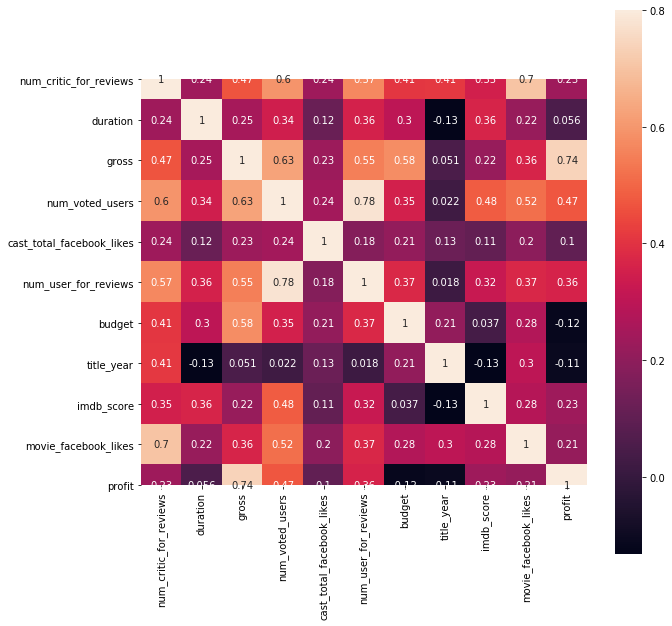

In [257]:
# visualizing correlation
plt.figure(figsize=(10,10))
sns.heatmap(df6.corr(), vmax=.8, square=True, annot=True);

IMDB Correlation Variables (Highest to lowest)

|Variable | Correlation Value
|:- |:-
|num_voted_users | .48 
|duration | .36
|num_critic_for_reviews | .35
|num_user_for_reviews | .32
|movie_facebook_likes | .28 
|profit | .23
|gross | .22
|cast_total_facebook_likes | .11 
|budget | .03 
|title_year | -.13


Key Variables Correlated with Each Other: 

| Variable | Variables Highest Correlation
|:- | :-
| num_voted_users | num_critic_for_reviews
| duration | profit
| num_critic_for_reviews | movie_facebook_likes
| num_user_for_reviews | num_voted_users
    

Reviewing over the correlation analysis, we can see that the higher number of people voting on the IMDB website drives the higher score. The next highest correlation is duration, unexpected correlation from our hypothesis. 

## 6. Regression

#### 6.1 Scikit

In [258]:
# removing imdb_score_bins variable
df7 = df6.drop(['imdb_score_bins'], axis=1)
df7.head(1)

director_name  num_critic_for_reviews  duration        gross  \
0  James Cameron                   723.0     178.0  760505847.0   

                            genres actor_1_name movie_title  num_voted_users  \
0  Action|Adventure|Fantasy|Sci-Fi  CCH Pounder     Avatar            886204   

   cast_total_facebook_likes                           plot_keywords  \
0                       4834  avatar|future|marine|native|paraplegic   

   num_user_for_reviews content_rating       budget  title_year  imdb_score  \
0                3054.0          PG-13  237000000.0      2009.0         7.9   

   movie_facebook_likes       profit  
0                 33000  523505847.0

In [259]:
# removing non numerical categories
df8 = df7.drop(['director_name', 'genres', 'actor_1_name', 'movie_title', 'plot_keywords','content_rating' ], axis=1)
df8.head(2)

num_critic_for_reviews  duration        gross  num_voted_users  \
0                   723.0     178.0  760505847.0           886204   
1                   302.0     169.0  309404152.0           471220   

   cast_total_facebook_likes  num_user_for_reviews       budget  title_year  \
0                       4834                3054.0  237000000.0      2009.0   
1                      48350                1238.0  300000000.0      2007.0   

   imdb_score  movie_facebook_likes       profit  
0         7.9                 33000  523505847.0  
1         7.1                     0    9404152.0

In [260]:
#assigning columns to X and Y variables
y = df8['imdb_score']  # assigning y variable

X = df8.drop(['imdb_score'], axis = 1)  # assigning X variable


In [261]:
# train validation model
# train data 
# test data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [262]:
# showing length of X and y
print(len(df8), len(X), len(y))

3777 3777 3777


In [263]:
# showing length of X_train, y_train, X_test, y_test
print(len(X_train), len(y_train), len(X_test), len(y_test))

2643 2643 1134 1134


In [264]:
# showing X_train data
X_train.head()

num_critic_for_reviews  duration       gross  num_voted_users  \
1657                    63.0     102.0  38747385.0            49349   
4862                    19.0      75.0    203134.0             1428   
4788                    71.0      98.0   2938208.0             7143   
2482                    40.0      93.0   7017178.0             1633   
999                     61.0     132.0  30306268.0            62981   

      cast_total_facebook_likes  num_user_for_reviews      budget  title_year  \
1657                      15308                 165.0  25000000.0      1986.0   
4862                          7                  21.0    250000.0      1997.0   
4788                        173                  52.0    225000.0      1990.0   
2482                       1373                  17.0  17500000.0      2013.0   
999                       58528                  84.0  50000000.0      1995.0   

      movie_facebook_likes      profit  
1657                     0  13747385.0  
4862                   178    -46866.0  
4788                   865   2713208.0  
2482                     0 -10482822.0  
999                      0 -19693732.0

In [265]:
# showing y_train data
y_train.head()

1657    6.9
4862    7.0
4788    7.5
2482    4.4
999     6.3
Name: imdb_score, dtype: float64

In [266]:
# showing X_train data
X_test.head()

num_critic_for_reviews  duration       gross  num_voted_users  \
4434                   178.0      95.0      3478.0            22212   
1065                   142.0     102.0  93607673.0            47573   
3500                   281.0      99.0   9166863.0            83182   
1662                   359.0     100.0  35266619.0           108242   
2692                   119.0      97.0  12212417.0            30643   

      cast_total_facebook_likes  num_user_for_reviews      budget  title_year  \
4434                        721                 142.0   1500000.0      2008.0   
1065                       9176                 343.0  48000000.0      2001.0   
3500                      14816                 247.0   7000000.0      2009.0   
1662                      20051                 371.0  30000000.0      2013.0   
2692                       1172                 144.0  15000000.0      2003.0   

      movie_facebook_likes      profit  
4434                     0  -1496522.0  
1065                   881  45607673.0  
3500                 16000   2166863.0  
1662                 39000   5266619.0  
2692                   622  -2787583.0

In [267]:
# showing y_test data
y_test.head()

4434    6.7
1065    5.7
3500    7.6
1662    5.9
2692    6.7
Name: imdb_score, dtype: float64

In [268]:
model1 = lm.LinearRegression()  # create model
model1.fit(X_train, y_train)  # train data
predicted_y = model1.predict(X_test) # built data

In [269]:
# creating coef and showing coef data
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_critic_for_reviews', '0.003'),
 ('duration', '0.013'),
 ('gross', '980656.529'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('num_user_for_reviews', '-0.001'),
 ('budget', '-980656.529'),
 ('title_year', '-0.022'),
 ('movie_facebook_likes', '-0.000'),
 ('profit', '-980656.529')]

In [270]:
# showing MSE and R-squared data
print("mean square error: ", mean_squared_error(y_test, predicted_y))
print("variance or r-squared: ", explained_variance_score(y_test, predicted_y))

mean square error:  0.7157024240153432
variance or r-squared:  0.351064230074269


When using the multiple regression model, the R-squared value is .35 and MSE is .71

#### 6.2 Statsmodels

In [271]:
# statsmodels

stat_model2 = ols("imdb_score~num_critic_for_reviews+duration+gross+num_voted_users+cast_total_facebook_likes+num_user_for_reviews+budget+title_year+movie_facebook_likes+profit",df8)
stat = stat_model2.fit()
print(stat.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     242.0
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        09:20:57   Log-Likelihood:                -4692.8
No. Observations:                3777   AIC:                             9406.
Df Residuals:                    3767   BIC:                             9468.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [272]:
# showing MSE data
stat.mse_resid

0.7044939684879366

In [273]:
# showing params data
stat.params

Intercept                    4.445490e+01
num_critic_for_reviews       2.851568e-03
duration                     1.158963e-02
gross                        4.895501e-07
num_voted_users              3.511238e-06
cast_total_facebook_likes   -2.901576e-08
num_user_for_reviews        -5.736508e-04
budget                      -4.944842e-07
title_year                  -1.981297e-02
movie_facebook_likes        -2.800402e-06
profit                      -4.904490e-07
dtype: float64

When using the Statsmodels, the r-squared value is .36 and MSE is .70

#### 6.3 Regularization

In [274]:
# Lasso model  #assigning columns to X and Y variables
y = df8['imdb_score']
X = df8[['num_critic_for_reviews', 'duration', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews', 'budget', 'title_year', 'movie_facebook_likes', 'profit']]


In [275]:
# Lasso model
model3 = linear_model.Lasso() 
model3.fit(X, y)
model3_y = model3.predict(X)

C:\Users\Kevin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 305.9401308296117, tolerance: 0.418852173682817



In [276]:
# showing coef and y-intersept data
print('Coefficients: ', model3.coef_)
print("y-intercept ", model3.intercept_)

Coefficients:  [ 2.00404083e-03  1.04063011e-02  9.27678897e-10  3.71870303e-06
 -3.43224405e-07 -4.74285974e-04 -5.94108575e-09 -5.79487517e-03
 -2.50798661e-06 -1.64040760e-09]
y-intercept  16.594000930156316


In [277]:
# showing coef data for variables
coef = ["%.3f" % i for i in model3.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_critic_for_reviews', '0.002'),
 ('duration', '0.010'),
 ('gross', '0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('num_user_for_reviews', '-0.000'),
 ('budget', '-0.000'),
 ('title_year', '-0.006'),
 ('movie_facebook_likes', '-0.000'),
 ('profit', '-0.000')]

In [278]:
# showing MSE and R-squared data
print("mean square error: ", mean_squared_error(y, model3_y))
print("variance or r-squared: ", explained_variance_score(y, model3_y))

mean square error:  0.7187768349469223
variance or r-squared:  0.35184289919661016


The Lasso regression model removed several X variables: gross, num_voted_users, cast_total_facebook_likes, budget, movie_facebook_likes, profit.  
The r-squared value is .35 and the MSE is 71.

#### 6.4 Feature selection

In [279]:
# Feature selection
X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)
X_new

array([[1.78000e+02, 8.86204e+05],
       [1.69000e+02, 4.71220e+05],
       [1.48000e+02, 2.75868e+05],
       ...,
       [8.10000e+01, 5.20550e+04],
       [9.50000e+01, 1.33800e+03],
       [9.00000e+01, 4.28500e+03]])

In [280]:
# showing X data
X.head()

num_critic_for_reviews  duration        gross  num_voted_users  \
0                   723.0     178.0  760505847.0           886204   
1                   302.0     169.0  309404152.0           471220   
2                   602.0     148.0  200074175.0           275868   
3                   813.0     164.0  448130642.0          1144337   
5                   462.0     132.0   73058679.0           212204   

   cast_total_facebook_likes  num_user_for_reviews       budget  title_year  \
0                       4834                3054.0  237000000.0      2009.0   
1                      48350                1238.0  300000000.0      2007.0   
2                      11700                 994.0  245000000.0      2015.0   
3                     106759                2701.0  250000000.0      2012.0   
5                       1873                 738.0  263700000.0      2012.0   

   movie_facebook_likes       profit  
0                 33000  523505847.0  
1                     0    9404152.0  
2                 85000  -44925825.0  
3                164000  198130642.0  
5                 24000 -190641321.0

In [281]:
# finding out which variables are selected

selector = SelectKBest(f_regression, k=2).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[1 3]


 Variables choosen: num_voted_users and duration

In [282]:
# finding MSE and R-squared data
model4 = lm.LinearRegression()
model4.fit(X_new, y)
model4_y = model4.predict(X_new)

print("mean square error: ", mean_squared_error(y, model4_y))
print("variance or r-squared: ", explained_variance_score(y, model4_y))

mean square error:  0.8033729670856395
variance or r-squared:  0.27555832646095657


The Feature Regression model r-squared value is .27 and MSE is .80

#### 6.5 Regression Storytelling

 The multiple regreesion model, the R-squared value is .35 and MSE is .71 

The Statsmodels has a R-squared value is .36 and MSE is .70  

The Lasso regression model removed several X variables: gross, num_voted_users, cast_total_facebook_likes, budget, movie_facebook_likes, profit.  
The R-squared value is .35 and the MSE is .71 

The Feature Regression model R-squared value is .27 and MSE is .80

**Best Regression Model** 
- Statsmodels: .36 R-Squared and .70 MSE

## 7. Classification

In [283]:
# reset index
df7.reset_index(drop=True)

director_name  num_critic_for_reviews  duration        gross  \
0          James Cameron                   723.0     178.0  760505847.0   
1         Gore Verbinski                   302.0     169.0  309404152.0   
2             Sam Mendes                   602.0     148.0  200074175.0   
3      Christopher Nolan                   813.0     164.0  448130642.0   
4         Andrew Stanton                   462.0     132.0   73058679.0   
5              Sam Raimi                   392.0     156.0  336530303.0   
6           Nathan Greno                   324.0     100.0  200807262.0   
7            Joss Whedon                   635.0     141.0  458991599.0   
8            David Yates                   375.0     153.0  301956980.0   
9            Zack Snyder                   673.0     183.0  330249062.0   
10          Bryan Singer                   434.0     169.0  200069408.0   
11          Marc Forster                   403.0     106.0  168368427.0   
12        Gore Verbinski                   313.0     151.0  423032628.0   
13        Gore Verbinski                   450.0     150.0   89289910.0   
14           Zack Snyder                   733.0     143.0  291021565.0   
15        Andrew Adamson                   258.0     150.0  141614023.0   
16           Joss Whedon                   703.0     173.0  623279547.0   
17          Rob Marshall                   448.0     136.0  241063875.0   
18      Barry Sonnenfeld                   451.0     106.0  179020854.0   
19         Peter Jackson                   422.0     164.0  255108370.0   
20             Marc Webb                   599.0     153.0  262030663.0   
21          Ridley Scott                   343.0     156.0  105219735.0   
22         Peter Jackson                   509.0     186.0  258355354.0   
23           Chris Weitz                   251.0     113.0   70083519.0   
24         Peter Jackson                   446.0     201.0  218051260.0   
25         James Cameron                   315.0     194.0  658672302.0   
26         Anthony Russo                   516.0     147.0  407197282.0   
27            Peter Berg                   377.0     131.0   65173160.0   
28       Colin Trevorrow                   644.0     124.0  652177271.0   
29            Sam Mendes                   750.0     143.0  304360277.0   
...                  ...                     ...       ...          ...   
3747        Lynn Shelton                   171.0      90.0    1573712.0   
3748       Alex Kendrick                    31.0     111.0   10174663.0   
3749        Travis Cluff                   159.0      81.0   22757819.0   
3750     Robert Townsend                    21.0      81.0    5228617.0   
3751       Larry Blamire                    88.0      90.0     110536.0   
3752           E.L. Katz                   193.0      88.0      59379.0   
3753      Dennis Iliadis                   241.0     114.0   32721635.0   
3754    Darren Aronofsky                   138.0      84.0    3216970.0   
3755     Myles Berkowitz                    32.0      87.0     536767.0   
3756     Morgan Spurlock                   193.0     100.0   11529368.0   
3757       Brandon Trost                    66.0      82.0      40557.0   
3758        Joe Swanberg                    65.0      82.0      30084.0   
3759        Edward Burns                    36.0      98.0   10246600.0   
3760         Lena Dunham                   113.0      98.0     389804.0   
3761  David Gordon Green                    75.0      90.0     241816.0   
3762        Kevin Jordan                    21.0      90.0     277233.0   
3763         Kevin Smith                   136.0     102.0    3151130.0   
3764       James Bidgood                     8.0      65.0       8231.0   
3765         Neil LaBute                    80.0      97.0    2856622.0   
3766          David Ayer                   233.0     109.0   10499968.0   
3767   Richard Linklater                    61.0     100.0    1227508.0   
3768         Jay Duplass            

In [284]:
# removing non numerical categories; keeping content rating - changing to int
df9 = df7.drop(['director_name', 'genres', 'actor_1_name', 'movie_title', 'plot_keywords'], axis=1)
df9.head(2)

num_critic_for_reviews  duration        gross  num_voted_users  \
0                   723.0     178.0  760505847.0           886204   
1                   302.0     169.0  309404152.0           471220   

   cast_total_facebook_likes  num_user_for_reviews content_rating  \
0                       4834                3054.0          PG-13   
1                      48350                1238.0          PG-13   

        budget  title_year  imdb_score  movie_facebook_likes       profit  
0  237000000.0      2009.0         7.9                 33000  523505847.0  
1  300000000.0      2007.0         7.1                     0    9404152.0

In [285]:
# checking content rating variable object names
df9['content_rating'].value_counts()

R            1706
PG-13        1307
PG            571
G              91
Not Rated      40
Unrated        23
Approved       17
X              10
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

In [286]:
# replacing variable object names to int
df9 = df9.replace({'content_rating': 'R'}, {'content_rating': '0'})
df9 = df9.replace({'content_rating': 'PG-13'}, {'content_rating': '1'})
df9 = df9.replace({'content_rating': 'PG'}, {'content_rating': '2'})
df9 = df9.replace({'content_rating': 'G'}, {'content_rating': '3'})
df9 = df9.replace({'content_rating': 'Not Rated'}, {'content_rating': '4'})
df9 = df9.replace({'content_rating': 'Unrated'}, {'content_rating': '5'})
df9 = df9.replace({'content_rating': 'Approved'}, {'content_rating': '6'})
df9 = df9.replace({'content_rating': 'X'}, {'content_rating': '7'})
df9 = df9.replace({'content_rating': 'NC-17'}, {'content_rating': '8'})
df9 = df9.replace({'content_rating': 'Passed'}, {'content_rating': '9'})
df9 = df9.replace({'content_rating': 'M'}, {'content_rating': '10'})
df9 = df9.replace({'content_rating': 'GP'}, {'content_rating': '11'})

df9['content_rating'] = df9['content_rating'].astype(int)
print(df9.dtypes)

num_critic_for_reviews       float64
duration                     float64
gross                        float64
num_voted_users                int64
cast_total_facebook_likes      int64
num_user_for_reviews         float64
content_rating                 int32
budget                       float64
title_year                   float64
imdb_score                   float64
movie_facebook_likes           int64
profit                       float64
dtype: object


In [287]:
# checkinng content_rating changed to int
df9.head(2)

num_critic_for_reviews  duration        gross  num_voted_users  \
0                   723.0     178.0  760505847.0           886204   
1                   302.0     169.0  309404152.0           471220   

   cast_total_facebook_likes  num_user_for_reviews  content_rating  \
0                       4834                3054.0               1   
1                      48350                1238.0               1   

        budget  title_year  imdb_score  movie_facebook_likes       profit  
0  237000000.0      2009.0         7.9                 33000  523505847.0  
1  300000000.0      2007.0         7.1                     0    9404152.0

In [288]:
# binning imbd scores for classification
df9['imdb_score_class'] = pd.cut(df9['imdb_score'], bins=[0, 4, 6, 8, 10], labels=[0, 1, 2, 3])
df9.head()

num_critic_for_reviews  duration        gross  num_voted_users  \
0                   723.0     178.0  760505847.0           886204   
1                   302.0     169.0  309404152.0           471220   
2                   602.0     148.0  200074175.0           275868   
3                   813.0     164.0  448130642.0          1144337   
5                   462.0     132.0   73058679.0           212204   

   cast_total_facebook_likes  num_user_for_reviews  content_rating  \
0                       4834                3054.0               1   
1                      48350                1238.0               1   
2                      11700                 994.0               1   
3                     106759                2701.0               1   
5                       1873                 738.0               1   

        budget  title_year  imdb_score  movie_facebook_likes       profit  \
0  237000000.0      2009.0         7.9                 33000  523505847.0   
1  300000000.0      2007.0         7.1                     0    9404152.0   
2  245000000.0      2015.0         6.8                 85000  -44925825.0   
3  250000000.0      2012.0         8.5                164000  198130642.0   
5  263700000.0      2012.0         6.6                 24000 -190641321.0   

  imdb_score_class  
0                2  
1                2  
2                2  
3                3  
5                2

In [289]:
# show info
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3777 entries, 0 to 5042
Data columns (total 13 columns):
num_critic_for_reviews       3777 non-null float64
duration                     3777 non-null float64
gross                        3777 non-null float64
num_voted_users              3777 non-null int64
cast_total_facebook_likes    3777 non-null int64
num_user_for_reviews         3777 non-null float64
content_rating               3777 non-null int32
budget                       3777 non-null float64
title_year                   3777 non-null float64
imdb_score                   3777 non-null float64
movie_facebook_likes         3777 non-null int64
profit                       3777 non-null float64
imdb_score_class             3777 non-null category
dtypes: category(1), float64(8), int32(1), int64(3)
memory usage: 372.7 KB


#### 7.1 Decision Tree

In [290]:
# declare X variables and y variable

y = df9['imdb_score_class']
X = df9.drop(['imdb_score','imdb_score_class'], axis=1)

print(y.shape, X.shape)

(3777,) (3777, 11)


In [291]:
# split validation

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
# Initialize DecisionTreeClassifier() 
dt = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 5)

# Train a decision tree model
dt = dt.fit(X_train, y_train)

dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [292]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")

0.7107583774250441
--------------------------------------------------------
[[  0  12  13   0]
 [  0 119 203   0]
 [  0  59 665   7]
 [  0   0  34  22]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.63      0.37      0.46       322
           2       0.73      0.91      0.81       731
           3       0.76      0.39      0.52        56

    accuracy                           0.71      1134
   macro avg       0.53      0.42      0.45      1134
weighted avg       0.68      0.71      0.68      1134

--------------------------------------------------------


C:\Users\Kevin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



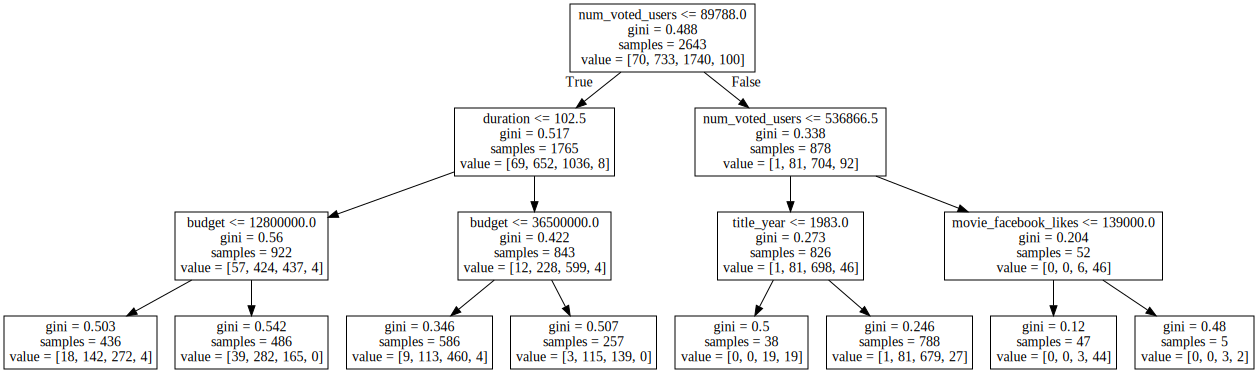

In [293]:
# visualizing decision tree
Source( tree.export_graphviz(dt, out_file=None, feature_names=X.columns))

**Decision Tree Classifier**
- Accuracy Score: .71
- Num_voted_users best predictor of IMDB Score

#### 7.2 KNN

In [294]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
# Initialize KNeighborsClassifier() 
knn = KNeighborsClassifier()

# Train a decision tree model
knn = knn.fit(X_train, y_train)

knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [295]:
# Model evaluation
print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")


0.5846560846560847
--------------------------------------------------------
[[  0   6  19   0]
 [  0  83 239   0]
 [  2 148 579   2]
 [  0   3  52   1]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.35      0.26      0.30       322
           2       0.65      0.79      0.71       731
           3       0.33      0.02      0.03        56

    accuracy                           0.58      1134
   macro avg       0.33      0.27      0.26      1134
weighted avg       0.53      0.58      0.55      1134

--------------------------------------------------------


In [296]:
scores = cross_val_score(KNeighborsClassifier(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.6        0.42216359 0.49868074 0.47229551 0.46965699 0.42440318
 0.39361702 0.41223404 0.49202128 0.65159574]
0.4836668101903342


In [297]:
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5, iid=False)

#fit model to training data
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid=False, n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [298]:
#save best model
knn_best = knn_gs.best_estimator_

#check best n_neigbors value
print(knn_gs.best_score_)
print(knn_gs.best_params_)
print(knn_gs.best_estimator_)

0.6541817036145958
{'n_neighbors': 23}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')


**KNN Classifier**
- Accuracy Score: .65

#### 7.4 Random Forest Classifier

In [299]:
clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7601410934744268

In [300]:
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

importance
num_voted_users              0.167777
duration                     0.116739
gross                        0.100545
budget                       0.096184
num_user_for_reviews         0.093454
num_critic_for_reviews       0.086530
profit                       0.085212
cast_total_facebook_likes    0.085144
title_year                   0.081168
movie_facebook_likes         0.059498
content_rating               0.027749

In [301]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.7601410934744268
--------------------------------------------------------
[[  1  18   6   0]
 [  4 178 140   0]
 [  1  73 654   3]
 [  0   0  27  29]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.17      0.04      0.06        25
           1       0.66      0.55      0.60       322
           2       0.79      0.89      0.84       731
           3       0.91      0.52      0.66        56

    accuracy                           0.76      1134
   macro avg       0.63      0.50      0.54      1134
weighted avg       0.75      0.76      0.75      1134



**Random Forest Classifier**
- Accuracy Score: .75
- Top importance variables: num_voted_users, duration, gross

#### 7.4 Recursive Feature Selection

In [302]:
model1 = LogisticRegression()
rfe = RFE(model1, 3)  #asking four best attributes
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print((rfe.support_))
print((rfe.ranking_))

[ True  True False False False False  True False False False False]
[1 1 8 6 5 3 1 7 2 4 9]


In [303]:
# Features sorted by their rank
pd.DataFrame({'feature':X.columns, 'importance':rfe.ranking_})

feature  importance
0      num_critic_for_reviews           1
1                    duration           1
2                       gross           8
3             num_voted_users           6
4   cast_total_facebook_likes           5
5        num_user_for_reviews           3
6              content_rating           1
7                      budget           7
8                  title_year           2
9        movie_facebook_likes           4
10                     profit           9

In [304]:
# selecting 4 most significant features only 
X_logistic = df9[['num_critic_for_reviews', 'duration', 'content_rating']]
print(X_logistic.head())

   num_critic_for_reviews  duration  content_rating
0                   723.0     178.0               1
1                   302.0     169.0               1
2                   602.0     148.0               1
3                   813.0     164.0               1
5                   462.0     132.0               1


In [305]:
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
rfe = LogisticRegression()
rfe.fit(X_train, y_train)

#Model evaluation
print(metrics.accuracy_score(y_test, rfe.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, rfe.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, rfe.predict(X_test)))

0.6569664902998237
--------------------------------------------------------
[[  0   2  23   0]
 [  0  34 281   0]
 [  0  32 711   0]
 [  0   0  51   0]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.50      0.11      0.18       315
           2       0.67      0.96      0.79       743
           3       0.00      0.00      0.00        51

    accuracy                           0.66      1134
   macro avg       0.29      0.27      0.24      1134
weighted avg       0.58      0.66      0.56      1134



C:\Users\Kevin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



**Recursive Feature Selection Classifier**
- Accuracy Score: .65
- Top importance variables: num_critic_for_reviews, duration, content_rating

#### 7.5 GradientBoostClassifier

In [306]:
# GradientBoostClassifier
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# initialize 
gb = GradientBoostingClassifier(n_estimators=100, random_state=0)

# fit the model
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [307]:
#Model evaluation
print(metrics.accuracy_score(y_test, gb.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, gb.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, gb.predict(X_test)))
print("--------------------------------------------------------")

0.7707231040564374
--------------------------------------------------------
[[  3  18   4   0]
 [  2 179 134   0]
 [  0  75 663   5]
 [  0   0  22  29]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.12      0.20        25
           1       0.66      0.57      0.61       315
           2       0.81      0.89      0.85       743
           3       0.85      0.57      0.68        51

    accuracy                           0.77      1134
   macro avg       0.73      0.54      0.58      1134
weighted avg       0.76      0.77      0.76      1134

--------------------------------------------------------


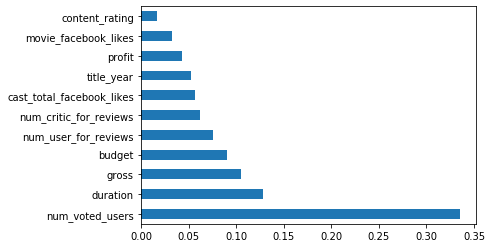

In [308]:
# finding the importance of each variable
pd.DataFrame(gb.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).plot(kind='barh', 
                                                                                                            legend=None);

**Gradient Boost Classifier**
- Accuracy Score: .77
- Top importance classifier: num_voted_users, duration, gross

#### 7.6 Classification Storytelling
Decision Tree Classifier
- Accuracy Score: .71
- Num_voted_users best predictor of IMDB Score  

KNN Classifier
- Accuracy Score: .65  

Random Forest Classifier
- Accuracy Score: .75
- Top importance variables: num_voted_users, duration, gross  

Recursive Feature Selection Classifier
- Accuracy Score: .65
- Top importance variables: num_critic_for_reviews, duration, content_rating  

Gradient Boost Classifier
- Accuracy Score: .77
- Top importance classifier: num_voted_users, duration, gross  

**Best Overall Classification Model:**  
Gradient Boost Classifier: .77

## 8. Clustering Analysis

In [309]:
# preparing data for clustering analysis
df10 = df9.drop(['imdb_score'], axis = 1)
df10.head()

num_critic_for_reviews  duration        gross  num_voted_users  \
0                   723.0     178.0  760505847.0           886204   
1                   302.0     169.0  309404152.0           471220   
2                   602.0     148.0  200074175.0           275868   
3                   813.0     164.0  448130642.0          1144337   
5                   462.0     132.0   73058679.0           212204   

   cast_total_facebook_likes  num_user_for_reviews  content_rating  \
0                       4834                3054.0               1   
1                      48350                1238.0               1   
2                      11700                 994.0               1   
3                     106759                2701.0               1   
5                       1873                 738.0               1   

        budget  title_year  movie_facebook_likes       profit imdb_score_class  
0  237000000.0      2009.0                 33000  523505847.0                2  
1  300000000.0      2007.0                     0    9404152.0                2  
2  245000000.0      2015.0                 85000  -44925825.0                2  
3  250000000.0      2012.0                164000  198130642.0                3  
5  263700000.0      2012.0                 24000 -190641321.0                2

In [310]:
# changing imdb_score_class to int
df10['imdb_score_class'] = df10['imdb_score_class'].astype(int)
print(df10.dtypes)

num_critic_for_reviews       float64
duration                     float64
gross                        float64
num_voted_users                int64
cast_total_facebook_likes      int64
num_user_for_reviews         float64
content_rating                 int32
budget                       float64
title_year                   float64
movie_facebook_likes           int64
profit                       float64
imdb_score_class               int32
dtype: object


In [311]:
# variance test

df10.var()

num_critic_for_reviews       1.530411e+04
duration                     5.133274e+02
gross                        4.851207e+15
num_voted_users              2.285501e+10
cast_total_facebook_likes    3.625609e+08
num_user_for_reviews         1.680274e+05
content_rating               1.280529e+00
budget                       2.222694e+15
title_year                   9.905826e+01
movie_facebook_likes         4.602284e+08
profit                       3.260995e+15
imdb_score_class             3.381926e-01
dtype: float64

In [312]:
# normalizing data
df_norm = (df10 - df10.mean()) / (df10.max() - df10.min())
df_norm.head()

num_critic_for_reviews  duration     gross  num_voted_users  \
0                0.687490  0.231936  0.931671         0.462774   
1                0.168378  0.201220  0.338510         0.217180   
2                0.538292  0.129547  0.194751         0.101567   
3                0.798464  0.184155  0.520924         0.615541   
5                0.365665  0.074940  0.027736         0.063890   

   cast_total_facebook_likes  num_user_for_reviews  content_rating    budget  \
0                  -0.010022              0.538147        0.012083  0.282820   
1                   0.056240              0.179112        0.012083  0.372820   
2                   0.000433              0.130871        0.012083  0.294248   
3                   0.145179              0.468356        0.012083  0.301391   
5                  -0.014531              0.080258        0.012083  0.320962   

   title_year  movie_facebook_likes    profit  imdb_score_class  
0    0.067386              0.068064  0.417875          0.096108  
1    0.044914             -0.026492 -0.002893          0.096108  
2    0.134802              0.217061 -0.047359          0.096108  
3    0.101094              0.443422  0.151571          0.429441  
5    0.101094              0.042276 -0.166621          0.096108

In [313]:
# checking df_norm variance
df_norm.var()

num_critic_for_reviews       0.023268
duration                     0.005979
gross                        0.008388
num_voted_users              0.008005
cast_total_facebook_likes    0.000841
num_user_for_reviews         0.006568
content_rating               0.010583
budget                       0.004536
title_year                   0.012506
movie_facebook_likes         0.003779
profit                       0.002184
imdb_score_class             0.037577
dtype: float64

### 8.1 KMeans Clustering

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

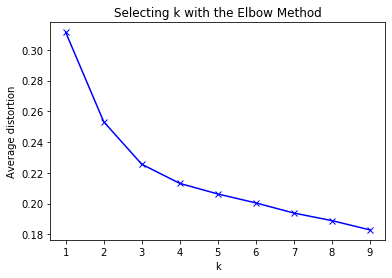

In [314]:
#The Elbow method

#https://www.packtpub.com/big-data-and-business-intelligence/mastering-machine-learning-scikit-learn#

#http://docs.scipy.org/doc/scipy/reference/spatial.distance.html
#Computes distance between each pair of the two collections of inputs
from scipy.spatial.distance import cdist 

K = range(1, 10) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(df_norm) 
    meandistortions.append(sum(np.min(cdist(df_norm, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df_norm.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 

In [315]:
# four clusters
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)

In [316]:
k_means.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [317]:
# cluster labels

k_means.labels_

array([3, 3, 3, ..., 2, 2, 2])

In [318]:
# find out cluster centers

k_means.cluster_centers_

array([[-0.06588416, -0.03232706, -0.02258697, -0.03917385, -0.00349978,
        -0.02559671,  0.00315269, -0.00466203,  0.01003289, -0.01811599,
        -0.01138802, -0.26524891],
       [ 0.11786561,  0.00731262,  0.00487273,  0.01935175,  0.00424916,
         0.01381829, -0.01979697,  0.00770335,  0.06774843,  0.01970183,
        -0.00138041,  0.0971486 ],
       [-0.08626459,  0.00548386, -0.0242051 , -0.0268907 , -0.00399764,
        -0.02445796,  0.01072778, -0.02094479, -0.06128923, -0.02132077,
        -0.00306655,  0.1065173 ],
       [ 0.29865364,  0.07861156,  0.19835946,  0.22945275,  0.01987   ,
         0.18088872,  0.00125238,  0.09883169,  0.03578739,  0.11400203,
         0.06684408,  0.2032079 ]])

In [319]:
# creating cluster variable
df11 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df11.head()

cluster
0        3
1        3
2        3
3        3
4        3

In [320]:
# join df10 & df11
df10 = df10.reset_index(drop=True)
df11 = df11.reset_index(drop=True)

df12 = df10.join(df11)
df12.head()

num_critic_for_reviews  duration        gross  num_voted_users  \
0                   723.0     178.0  760505847.0           886204   
1                   302.0     169.0  309404152.0           471220   
2                   602.0     148.0  200074175.0           275868   
3                   813.0     164.0  448130642.0          1144337   
4                   462.0     132.0   73058679.0           212204   

   cast_total_facebook_likes  num_user_for_reviews  content_rating  \
0                       4834                3054.0               1   
1                      48350                1238.0               1   
2                      11700                 994.0               1   
3                     106759                2701.0               1   
4                       1873                 738.0               1   

        budget  title_year  movie_facebook_likes       profit  \
0  237000000.0      2009.0                 33000  523505847.0   
1  300000000.0      2007.0                     0    9404152.0   
2  245000000.0      2015.0                 85000  -44925825.0   
3  250000000.0      2012.0                164000  198130642.0   
4  263700000.0      2012.0                 24000 -190641321.0   

   imdb_score_class  cluster  
0                 2        3  
1                 2        3  
2                 2        3  
3                 3        3  
4                 2        3

In [321]:
# checking for NaN
df12.tail()

num_critic_for_reviews  duration      gross  num_voted_users  \
3772                   143.0      77.0   424760.0            72639   
3773                    35.0      80.0    70071.0              589   
3774                    56.0      81.0  2040920.0            52055   
3775                    14.0      95.0     4584.0             1338   
3776                    43.0      90.0    85222.0             4285   

      cast_total_facebook_likes  num_user_for_reviews  content_rating  budget  \
3772                        368                 371.0               1  7000.0   
3773                          0                  35.0               4  7000.0   
3774                        147                 130.0               0  7000.0   
3775                        690                  14.0               4  9000.0   
3776                        163                  84.0               2  1100.0   

      title_year  movie_facebook_likes     profit  imdb_score_class  cluster  
3772      2004.0                 19000   417760.0                 2        2  
3773      2005.0                    74    63071.0                 2        2  
3774      1992.0                     0  2033920.0                 2        2  
3775      2011.0                   413    -4416.0                 2        2  
3776      2004.0                   456    84122.0                 2        2

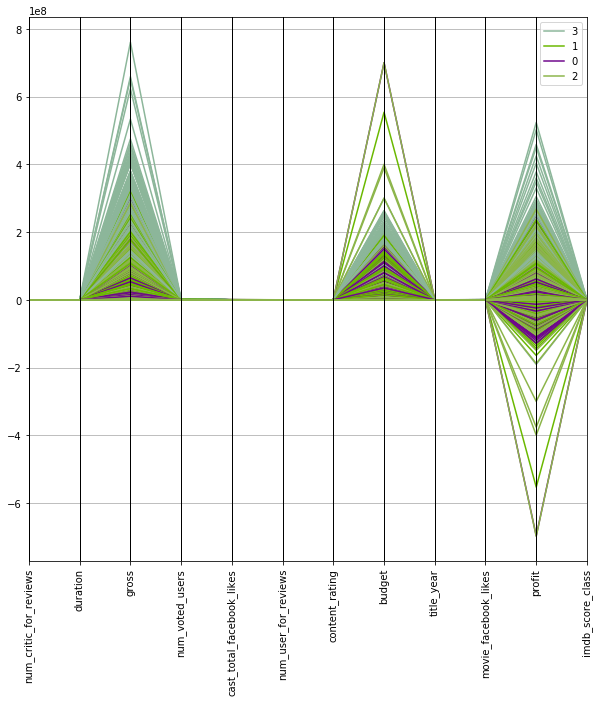

In [322]:
# visualizing cluster variable data
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
parallel_coordinates(df12, 'cluster');

In [324]:
# Checking cluster sizes
df12.groupby(['cluster']).size()

cluster
0    1130
1     960
2    1410
3     277
dtype: int64

In [323]:
# cluster mean for each variable
df12.groupby(['cluster']).mean() 

num_critic_for_reviews    duration         gross  num_voted_users  \
cluster                                                                      
0                    112.013274  100.570796  3.478754e+07     38055.350442   
1                    261.159375  112.185417  5.572845e+07    137065.340625   
2                     95.517021  111.649645  3.353337e+07     58785.217021   
3                    407.653430  133.075812  2.028186e+08    491958.003610   

         cast_total_facebook_likes  num_user_for_reviews  content_rating  \
cluster                                                                    
0                      9117.361947            202.585841        0.901770   
1                     14194.801042            402.275000        0.650000   
2                      8802.092908            208.259574        0.984397   
3                     24465.003610           1246.989170        0.880866   

               budget   title_year  movie_facebook_likes        profit  \
cluster                                                                  
0        3.576294e+07  2003.895575           2923.301770 -9.754004e+05   
1        4.444831e+07  2009.028125          16138.513542  1.128014e+07   
2        2.435908e+07  1997.558865           1803.553901  9.174286e+06   
3        1.082085e+08  2006.187726          49032.490975  9.461003e+07   

         imdb_score_class  
cluster                    
0                0.915929  
1                2.003125  
2                2.031206  
3                2.321300

| Variable Name | Cluster 0 | Cluster 1 | Cluster 2 | Cluster 3
|:-|:-|:-|:-|:-
| Num_critic_for_reviews | Mid-Low | Mid-High | Low | High
| Duration | Low | Mid-High | Mid-Low | High
| Gross | Mid-Low | Mid-High | Mid-Low | High
| Num_voted_users | Low | Mid-High | Low | High
| Cast_total_facebook_likes | Mid-Low | Mid-High | Low | High
| Num_user_for_reviews | Low | Mid-High  | Mid-Low | High
| Content_rating | Mid-High | Low | High | Mid-Low
| Budget | Mid-Low | Mid-High | Low | High
| Title_year | Mid-Low | High | Low | Mid-High
| Movie_facebook_likes | Mid-Low | Mid-High | Low | High 
| Profit | Low | Mid-Low | Mid-High | High
| Imdb_score_class | Low | Mid-low | Mid-High | High

### 8.2 Decision Tree Model

In [325]:
# Defining (y, X) variables
y = df12['cluster'].values
X = df12.drop(['cluster', 'imdb_score_class'], axis=1)
X.head()

num_critic_for_reviews  duration        gross  num_voted_users  \
0                   723.0     178.0  760505847.0           886204   
1                   302.0     169.0  309404152.0           471220   
2                   602.0     148.0  200074175.0           275868   
3                   813.0     164.0  448130642.0          1144337   
4                   462.0     132.0   73058679.0           212204   

   cast_total_facebook_likes  num_user_for_reviews  content_rating  \
0                       4834                3054.0               1   
1                      48350                1238.0               1   
2                      11700                 994.0               1   
3                     106759                2701.0               1   
4                       1873                 738.0               1   

        budget  title_year  movie_facebook_likes       profit  
0  237000000.0      2009.0                 33000  523505847.0  
1  300000000.0      2007.0                     0    9404152.0  
2  245000000.0      2015.0                 85000  -44925825.0  
3  250000000.0      2012.0                164000  198130642.0  
4  263700000.0      2012.0                 24000 -190641321.0

In [326]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [327]:
# instantiate a decision tree model, and fit with X and y
model = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 7)

model = model.fit(X, y)    

# check the accuracy on the training set
model.score(X, y)

0.7352396081546201

In [328]:
predicted_Y = model.predict(X)
print(predicted_Y)

[3 3 3 ... 2 2 2]


In [329]:
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO() 
tree.export_graphviz(model, out_file=dot_data, feature_names=X.columns,
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("data/dt01.pdf")

True

In [330]:
# Displaying Decision Tree
from IPython.display import IFrame
IFrame('data/dt01.pdf', width=1000, height=500)

### Decision Tree  
- Important Variables: Num_critic_for_Reviews, Num_voted_users, Duration  
- These variables dictated the the top three decision tree leaves

### 8.3 Random Forest Classifier

In [331]:
# build randomforeastmodel

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
rfc = rfc.fit(X, y)
rfc.score(X,y)

0.9973523960815462

In [332]:
# showing rfc variable importance
pd.DataFrame({'feature':X.columns, 'importance':rfc.feature_importances_})

feature  importance
0      num_critic_for_reviews    0.241021
1                    duration    0.079419
2                       gross    0.088718
3             num_voted_users    0.146354
4   cast_total_facebook_likes    0.056326
5        num_user_for_reviews    0.083303
6              content_rating    0.017798
7                      budget    0.073230
8                  title_year    0.098891
9        movie_facebook_likes    0.062487
10                     profit    0.052452

### RandomForestClassifier  
- Important Variables: num_critic_for_reviews, num_voted_users , title_year 


### 8.4 Agglomerative Clustering

In [333]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)
agg.labels_

array([2, 1, 1, ..., 3, 3, 3], dtype=int64)

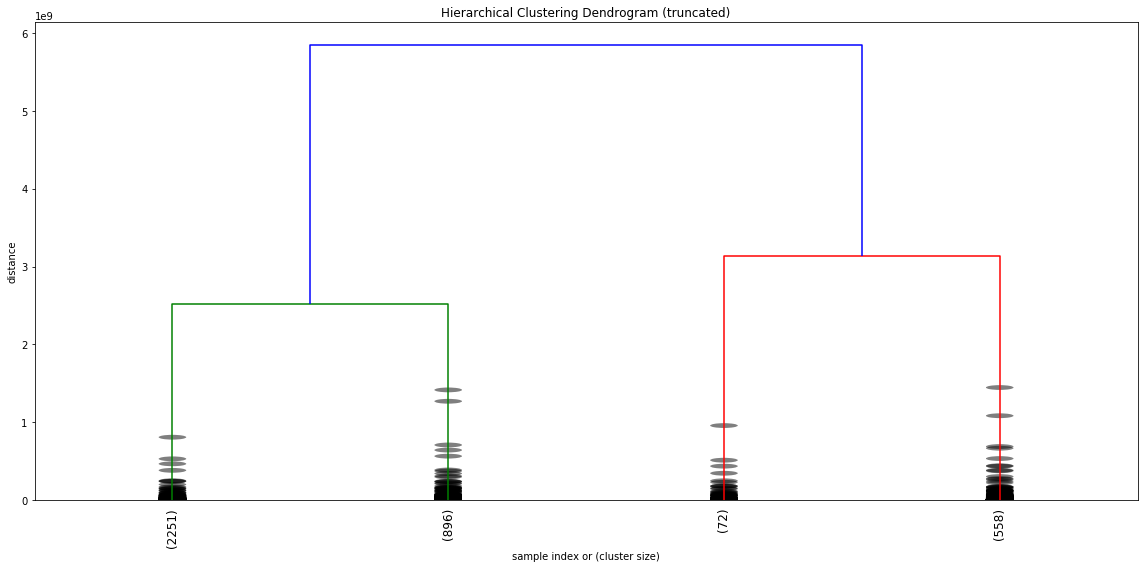

In [334]:
# visualizing Agglomerative cluster 
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=4,  # show only the last p merged clusters
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

How many observations are in each cluster?  
- Cluster 0 = 2251   
- Cluster 1 = 896  
- Cluster 2 = 72  
- Cluster 3 = 558  

In [335]:
# creating cluster variable
df13 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df13.head()

cluster
0        2
1        1
2        1
3        2
4        0

In [336]:
# join df10 & df13
df10 = df10.reset_index(drop=True)
df13 = df13.reset_index(drop=True)

df14 = df10.join(df13)
df14.head()

num_critic_for_reviews  duration        gross  num_voted_users  \
0                   723.0     178.0  760505847.0           886204   
1                   302.0     169.0  309404152.0           471220   
2                   602.0     148.0  200074175.0           275868   
3                   813.0     164.0  448130642.0          1144337   
4                   462.0     132.0   73058679.0           212204   

   cast_total_facebook_likes  num_user_for_reviews  content_rating  \
0                       4834                3054.0               1   
1                      48350                1238.0               1   
2                      11700                 994.0               1   
3                     106759                2701.0               1   
4                       1873                 738.0               1   

        budget  title_year  movie_facebook_likes       profit  \
0  237000000.0      2009.0                 33000  523505847.0   
1  300000000.0      2007.0                     0    9404152.0   
2  245000000.0      2015.0                 85000  -44925825.0   
3  250000000.0      2012.0                164000  198130642.0   
4  263700000.0      2012.0                 24000 -190641321.0   

   imdb_score_class  cluster  
0                 2        2  
1                 2        1  
2                 2        1  
3                 3        2  
4                 2        0

In [337]:
# checking for NaN
df14.tail()

num_critic_for_reviews  duration      gross  num_voted_users  \
3772                   143.0      77.0   424760.0            72639   
3773                    35.0      80.0    70071.0              589   
3774                    56.0      81.0  2040920.0            52055   
3775                    14.0      95.0     4584.0             1338   
3776                    43.0      90.0    85222.0             4285   

      cast_total_facebook_likes  num_user_for_reviews  content_rating  budget  \
3772                        368                 371.0               1  7000.0   
3773                          0                  35.0               4  7000.0   
3774                        147                 130.0               0  7000.0   
3775                        690                  14.0               4  9000.0   
3776                        163                  84.0               2  1100.0   

      title_year  movie_facebook_likes     profit  imdb_score_class  cluster  
3772      2004.0                 19000   417760.0                 2        3  
3773      2005.0                    74    63071.0                 2        3  
3774      1992.0                     0  2033920.0                 2        3  
3775      2011.0                   413    -4416.0                 2        3  
3776      2004.0                   456    84122.0                 2        3

In [338]:
# cluster mean for each variable 
df14.groupby('cluster').mean()

num_critic_for_reviews    duration         gross  num_voted_users  \
cluster                                                                      
0                    175.956473  115.494420  4.429902e+07     92136.212054   
1                    239.254480  117.059140  1.472016e+08    236739.553763   
2                    396.111111  131.888889  3.670809e+08    542730.666667   
3                    135.586850  105.434474  2.132908e+07     62200.564638   

         cast_total_facebook_likes  num_user_for_reviews  content_rating  \
cluster                                                                    
0                     13779.446429            338.587054        0.862723   
1                     16641.500000            600.956989        1.139785   
2                     30340.083333           1393.583333        1.361111   
3                      8574.215016            228.841404        0.785429   

               budget   title_year  movie_facebook_likes        profit  \
cluster                                                                  
0        7.190953e+07  2004.896205           8948.780134 -2.761052e+07   
1        7.154367e+07  2002.388889          19206.575269  7.565797e+07   
2        1.339972e+08  2005.805556          44750.000000  2.330836e+08   
3        1.483894e+07  2002.311417           5759.191026  6.490143e+06   

         imdb_score_class  
cluster                    
0                1.582589  
1                1.912186  
2                2.263889  
3                1.695691

| Variable Name | Cluster 0 | Cluster 1 | Cluster 2 | Cluster 3
|:-|:-|:-|:-|:-
| Num_critic_for_reviews | Mid-Low | Mid-High | High | Low
| Duration | Mid-Low | Mid-High | High | Low
| Gross | Mid-Low | Mid-High | High | Low
| Num_voted_users | Mid-Low | Mid-High | High | Low
| Cast_total_facebook_likes | Mid-Low | Mid-High | High | Low
| Num_user_for_reviews | Mid-Low | Mid-High  | High | Low
| Content_rating | Mid-Low | Mid-High | High | Low
| Budget | Mid-High | Mid-Low | High  | Low
| Title_year | Mid-High | Mid-Low | High | Low
| Movie_facebook_likes | Mid-Low | Mid-High | High | Low 
| Profit | Low | High | Mid-Low | High
| Imdb_score_class | Low | Mid-High | High | Mid-Low

## Comparing the results from K-Means  and Agglomerative clustering analysis

- K-Means and Agglomerative had very different oberservations  
    - K-Means: 0=1130, 1=960, 2=1410, 3=277  
    - Agglomerative: 0=2251, 1=896, 2=72, 3=558  
- K-Means clusters Profit vs IMDB Score Class had the same score for Low/Mid-Low/Mid-High/High
- Agglomerative clusters Profit vs IMDB Score Class had the same Low score, but different scores for Mid-low/Mid-high/High

## 10. Storytelling

**Purpose**  
Discovering what variables may predict movie success using the IMDB 5000 Movie Database

**Hypothesis**  
- IMDB Score - Budget - Gross - Profit - Number of Critic Reviews - Number of User Reviews
- Number of Voted Users - Movie Facebook Likes - Cast Total Facebook Likes

**IMDB Scores**  
- Mean: 6.44  - Median: 5.8 - Max: 9.5 - Min: 1.6  

**IMDB Database Set**  
- Started with 5043 entries and 28 variables  
- Reviewed over important value counts
- Cleaned and transformed dataset
- Ended with 3784 entries and 17 variables (75% of database)  

**Business Intelligence**  
- Visualized data using scatterplot with trendline (ols)
- Scatterplots created were from the Important Variables from Hypothesis:  
    - Profit - Gross - Number of Critics Reviews - Budget - Number of User Reviews 
    - Cast Total Facebook Likes - Movie Facebook Likes - Number of Voted Users
- IMDB Scores were Binned by 0-2, 2-4, 4-6, 6-8, 8-10
    - Mean value for IMDB Scores had higher correlation
    - Binned IMDB Scores were not distributed evenly, skewing the correlation values creating inacurate information  
    
**Correlation Analysis**
- Discovered top variable was Number of Voted Users
- Unexpected variable was Duration (2nd highest)
- Discovered key variables had high correlation to other reviews and social media variables  

When thinking about IMDB Scores, our business minds drift towards budget/profit/gross (money related) as what drives the higher IMDB Scores. After visualizing the IMDB Database, we discovered that the top variable influencing a higher IMDB Score are: Number of Voted Users.  

**Regression**  


**Classification**  


**Clustering**  


## Reference Section

IEEE website - https://ieeexplore.ieee.org/abstract/document/8703320  
Research Gate Website - https://www.researchgate.net/publication/282133920_Predicting_Movie_Success_Based_on_IMDB_Data  
Stackoverflow Website - https://stackoverflow.com/questions/21892570/ipython-notebook-align-table-to-the-left-of-cell     
MIS 665 Section A - Mid-term Project - Online Forum: Midterm Project  -  https://k-state.instructure.com/courses/81006/discussion_topics/505217?module_item_id=1875123

Kevin Moodie  -- Final Project

"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work." 